# Climatologies and Anomalies

This notebook will demonstrate how to use the earthkit libraries to access some ERA5 data, calculate some climatologies and anomalies then plot the output.

For this exercise we will use the earthkit-data package to access the data, earthkit-climate to calculate our climatologies and anomalies and earthkit-maps to plot the results.

The earthkit-climate routines are *currently* based on xarray, hence they return raw xarray objects. *This may change in future versions of Earthkit*.

In [1]:
import numpy as np
from earthkit import data as ek_data
from earthkit.climate import aggregate as ek_aggregate
from earthkit import maps as ek_maps

import warnings
warnings.filterwarnings("ignore")

In [2]:
cds_dataset_name = 'reanalysis-era5-single-levels'

# We use an Earthkit bounding box object to describe our area, this clears up any lack of clarity of the order of
#  North, South, East, West.
area = ek_data.utils.bbox.BoundingBox(north=80, south=20, west=-30, east=100)
cds_request = {
    'product_type': 'reanalysis',
    'variable': '2m_temperature',
    'year': [
        # "2000", "2001", "2002",
        # "2003", "2004", "2005",
        # "2006", "2007", "2008",
        # "2009", "2010", "2011",
        # "2012", "2013", "2014",
        "2015", "2016", "2017",
        # "2018", "2019", "2020",
        # "2021", "2022"
    ],
    'month': [
        '01', '02', '03',
        '04', '05', '06',
        '07', '08', '09',
        '10', '11', '12',
    ],
    'day': [
        '01', '02', '03',
        '04', '05', '06',
        '07', '08', '09',
        '10', '11', '12',
        '13', '14', '15',
        '16', '17', '18',
        '19', '20', '21',
        '22', '23', '24',
        '25', '26', '27',
        '28', '29', '30',
        '31',
    ],
    'time': [
        '00:00', '06:00', '12:00', '18:00',
    ],
    'area': area
}
# ear5_data.save('data/era5-t2m-Europe-2000_2022.grib')
era5_data = ek_data.from_source("cds", cds_dataset_name, cds_request)


View the data object in the format that you prefer:

In [3]:
# As an xarray:
era5_xr = era5_data.to_xarray()
era5_xr
# # As a fieldlist
# era5_data.ls()
# # As a numpy array:
# era5_data.to_numpy()

<xarray.Dataset>
Dimensions:     (number: 1, time: 4384, step: 1, surface: 1, latitude: 241,
                 longitude: 521)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2017-12-31T18:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-08T16:39 GRIB to CDM+CF via cfgrib-0.9.1...

# Calculate climatologies

Climatologies are represnetations of the meteorology over climatic time-scales, typically this is considered 20-30 years. For demonstrative purposes, in this training example we are using just three years.

In [4]:
# All earthkit methods are fully documented, it is possible to view the supporting documentation for a given
#  method using python's help function which describes all accepted input variables, e.g.:
help(ek_aggregate.climatology.mean)

Help on function mean in module earthkit.climate.aggregate.climatology:

mean(dataarray: Union[xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray], time_dim: Optional[str] = None, groupby_kwargs: dict = {}, **reduce_kwargs) -> xarray.core.dataarray.DataArray
    Calculate the climatological mean.
    
    Parameters
    ----------
    dataarray : xr.DataArray
        The DataArray over which to calculate the climatological mean. Must
        contain a `time` dimension.
    frequency : str (optional)
        Valid options are `day`, `week` and `month`.
    bin_widths : int or list (optional)
        If `bin_widths` is an `int`, it defines the width of each group bin on
        the frequency provided by `frequency`. If `bin_widths` is a sequence
        it defines the edges of each bin, allowing for non-uniform bin widths.
    time_dim : str (optional)
        Name of the time dimension in the data object, default behviour is to detect the
        time dimension from the input 

So to calculate the mean monthly climatology of the 6 hourly ERA5 data:

In [5]:
# Specify the frequency at which we want our climatology, other possible values are:
#  'dayofyear', 'season', 'year', 'hour'
# If a frequency is not provided then ek_cliamte will try to detect the frequency of the input data
#  and use that.
climatology_frequency = 'month'
climatology = ek_aggregate.climatology.mean(era5_data, frequency=climatology_frequency)
climatology

<xarray.Dataset>
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 241, longitude: 521,
                month: 12)
Coordinates:
  * number     (number) int64 0
  * step       (step) timedelta64[ns] 00:00:00
  * surface    (surface) float64 0.0
  * latitude   (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m        (month, number, step, surface, latitude, longitude) float32 24...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-08T16:39 GRIB to CDM+CF via cfgrib-0.9.1...

And we can plot this using Earthkit maps

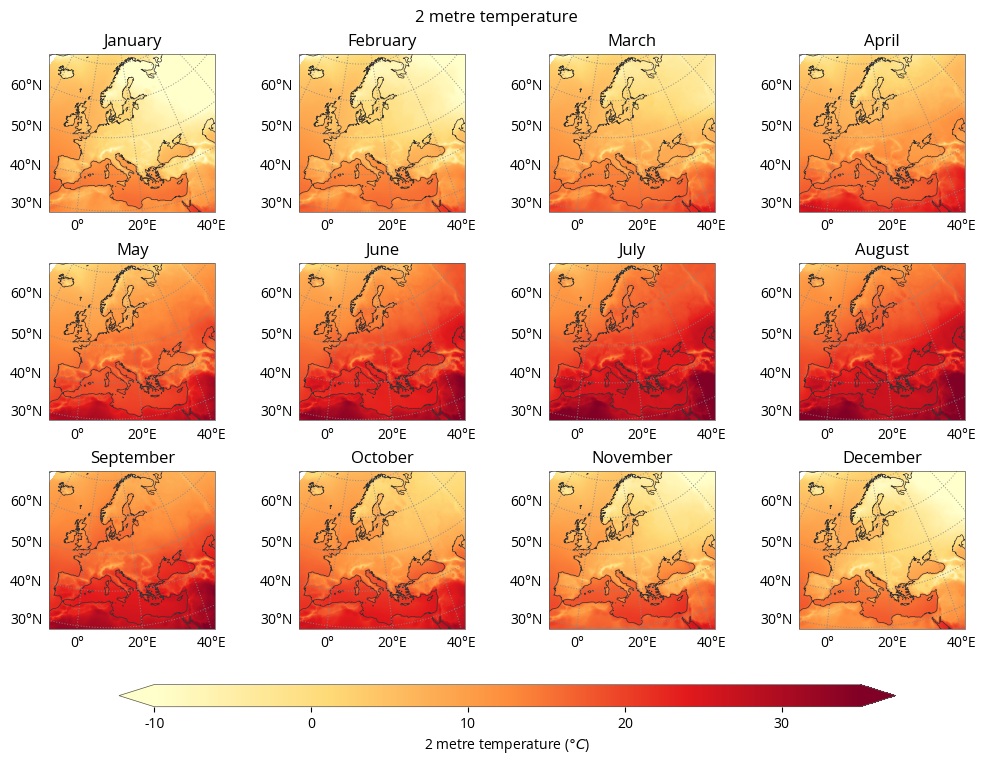

In [6]:
style = ek_maps.styles.Contour(
    # colors = 'turbo',  # provide a named matplotlib colormap
    colors=["#ffffcc","#fed976","#fd8d3c","#e31a1c","#800026"],  # Or provide a list of colours to interpolate
    levels=np.arange(-10, 35.01, 0.1),
    units="celsius",
    extend='both',  # How to handle out-of-bounds values, can be None (default), 'min', 'max' ot 'both'
    # The legend/colorbar ticks can be included here or when the legend is added
    ticks=np.arange(-10,36,10)
)

# chart = ek_maps.Superplot(domain=area, rows=3)
chart = ek_maps.Superplot(domain="Europe", rows=3)
chart.plot(
    climatology,
    style=style,
) # this automatically converts units
chart.title("{long_name}")

# For the subplot titles we use the value of the dimension created when calculating the climatology
chart.subplot_titles(f"{{{climatology_frequency}}}")

# We can now add coastlines, gridlines and a legend
chart.coastlines(resolution='medium')
chart.gridlines()
chart.legend() # It is also possible to define the legend ticks here, this will override anything 

chart.show()

## Calculate some anomalies

Anomolies are the difference between the meteorology that is estimated for a given time in comparison to a reference climatology period. 

Using our sample data, we calculate the anomaly with respect to our 3 year climatology. It is also possible to set the period of the data to use for the climatology reference period using the `climatology_range` kwarg.

For more details on the inputs available for the anomaly method please use `help(ek_climate.climatology.anomaly)`

In [7]:
anomaly = ek_aggregate.climatology.anomaly(era5_data, frequency="month")  #, climatology_range=('2015', '2016'))
anomaly

<xarray.Dataset>
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 241, longitude: 521,
                time: 36)
Coordinates:
  * number     (number) int64 0
  * step       (step) timedelta64[ns] 00:00:00
  * surface    (surface) float64 0.0
  * latitude   (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
  * time       (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2017-12-31
Data variables:
    t2m        (time, number, step, surface, latitude, longitude) float32 1.5...

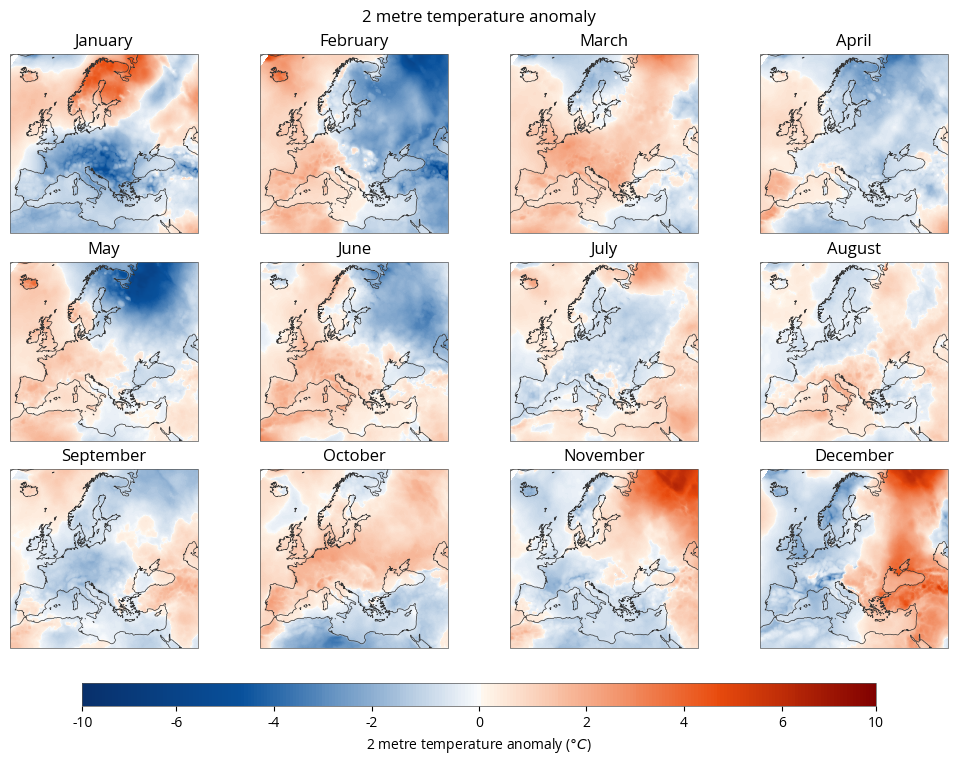

In [8]:
# Define a colour map with a list of colours, and a distribution of levels for those colours
#  Here we want more colours between 0 and 6 than in between 6 and 10
style = ek_maps.styles.Contour(
    colors=['#08306b', '#08519c', '#f9fbfd', '#fff7ec', '#e94b0d', '#7f0000'],
    levels=[-10, -6, -0.1, 0.1, 6, 10],
    gradients=[30, 90, 10, 90, 30],
    units="celsius",
    ticks=[-10, -6, -4, -2, 0, 2, 4, 6, 10]
)

chart = ek_maps.Superplot(domain="Europe", rows=3)

chart.plot(anomaly.sel(time='2017'), style=style) # this automatically converts units
chart.title("{long_name}")

chart.subplot_titles(f"{{{climatology_frequency}}}")

chart.coastlines(resolution='medium')
chart.legend()

chart.show()

And nearly identical to return the relative anomaly

In [9]:
relative_anomaly = ek_aggregate.climatology.relative_anomaly(era5_data, frequency="month")
relative_anomaly

<xarray.Dataset>
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 241, longitude: 521,
                time: 36)
Coordinates:
  * number     (number) int64 0
  * step       (step) timedelta64[ns] 00:00:00
  * surface    (surface) float64 0.0
  * latitude   (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
  * time       (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2017-12-31
Data variables:
    t2m        (time, number, step, surface, latitude, longitude) float32 0.6...

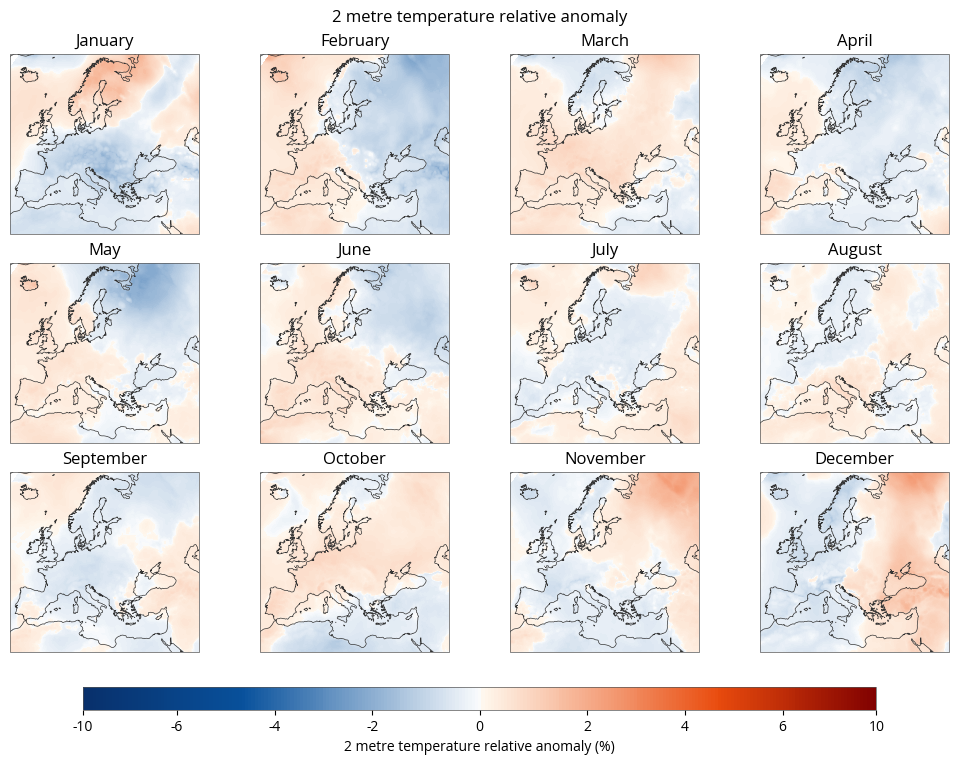

In [10]:
style = ek_maps.styles.Contour(
    colors=['#08306b', '#08519c', '#f9fbfd', '#fff7ec', '#e94b0d', '#7f0000'],
    levels=[-10, -6, -0.1, 0.1, 6, 10],
    gradients=[30, 90, 10, 90, 30],
    ticks=[-10, -6, -4, -2, 0, 2, 4, 6, 10]
)

chart = ek_maps.Superplot(domain="Europe", rows=3)

chart.plot(relative_anomaly.sel(time='2017'), style=style)
chart.title("{long_name}")

chart.subplot_titles(f"{{{climatology_frequency}}}")

chart.coastlines(resolution='medium')
chart.legend()

chart.show()